# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

## Enunciado

Este conjunto de datos describe los hongos en términos de sus *características físicas*.

Se clasifican como:

- **Venenosos**
- **Comestibles**

Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de *hongos de láminas* en las familias *Agaricus* y *Lepiota*.

Cada especie se identifica como:

- Definitivamente **comestible**.
- Definitivamente **venenosa** o de comestibilidad desconocida.
- No recomendada (esta última clase se combinó con la **venenosa**).

La guía establece claramente que no hay una regla simple para determinar la comestibilidad de un hongo.

Con esa información:

- Siendo la clase *positiva* la indicación que el hongo es *venenoso* ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de recall alto?

<10%> Respuesta: dado el set de datos, nuestro clasificador debe determinar aquellos hongos que son venenosos (elemento relevante). Entonces tenemos que:

- Hongo comestible, determinado como venenoso (falso positivo - FP)
- Hongo comestible, determinado como comestible (verdadero negativo - VN)
- Hongo venenoso, determinado como comestible (falso negativo - FN)
- Hongo venenoso, determinado como venenoso (verdadero positivo - VP)

La métrica de *recall* nos dice el ratio entre VP y la suma de VP con FN: `VP / (VP + FN)`.

Si le pido un puntaje de *recall* alto al clasificador, le estamos pidiendo que no se le hayan escapado hongos **venenosos** que haya marcado como **comestibles**, ya consumir un venenoso puede ocasionar la muerte.

### Obtención de datos
Importe las librerías a utilizar:

In [1]:
import matplotlib.pyplot as plt  # Gráficos de curvas
import numpy as np  # Computación científica
import pandas as pd  # Análisis y manipulación de datos

Importe los datos:

In [2]:
# Lectura de archivo separado por comas para analizar.

url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/mushroom.csv'
df = pd.read_csv(url)

# Todos los datos estan encerrados entre b''.
# Por lo que localmente yo lo modifiqué quitandoselos.
# df = pd.read_csv('mushroom.txt')

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [3]:
# Analizamos los datos presentes en las primeras 5 filas.
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [4]:
# Resumen del contenido de la tabla de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [5]:
# Estadísticas de cada columna de la tabla de datos.
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


### Respuesta

Dada la investigación anterior, podemos afirmar:

- Ningún dato figura como `NaN` o nulo
- Se considera que **todas** las variables influyen en la clasificación
- Todos los datos son de variable **categórica**
- Generalmente se repiten muchas enumeraciones en cada columna
- La columna `class` presenta únicamente dos tipos de datos, y determina si el hongo es:
  - `'e'` - Edible - Comestible
  - `'p'` - Poisonous - Venenoso

### Procesado y transformación de datos

<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

### Respuesta

Al ser **todas** las columnas de variable categórica no se puede utilizar como input en los modelos, por ende se debe tranformar a variable numérica. En este caso como las variables no tienen un orden específico voy a utilizar el `OneHotEncoder` para transformar **todas** las columnas **excepto** la que determina la **class** (clase: comestible o venenoso) del hongo.

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [6]:
# Separamos a la columna 'class' de las demás.

x = df.drop(columns='class')
y = df['class'].to_numpy()

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# De todas las variables que no son la clase,
# las transformamos de categóricas a numéricas con 'OneHotEncoder'
matrix = encoder.fit_transform(x).toarray()
columns = encoder.get_feature_names_out()
x = pd.DataFrame(encoder.fit_transform(x).toarray(), columns=columns)

In [8]:
x

,cap-shape_b'b',cap-shape_b'c',cap-shape_b'f',cap-shape_b'k',cap-shape_b's',cap-shape_b'x',cap-surface_b'f',cap-surface_b'g',cap-surface_b's',cap-surface_b'y',...,population_b's',population_b'v',population_b'y',habitat_b'd',habitat_b'g',habitat_b'l',habitat_b'm',habitat_b'p',habitat_b'u',habitat_b'w'
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
y

array(["b'p'", "b'e'", "b'e'", ..., "b'e'", "b'p'", "b'e'"], dtype=object)

<5%> Separar X_train, y_train, X_test, y_test

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    shuffle=True,
    test_size=0.2,
    random_state=42,
)

In [11]:
y_train_poison = (y_train == "b'p'")
y_test_poison = (y_test == "b'p'")

# Si se utiliza el csv modificado:
# y_train_poison = (y_train == 'p')
# y_test_poison = (y_test == 'p')

### Selección de modelo y entrenamiento
 


<15%> Utilice validación cruzada para evaluar los modelos que se importaron.
Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

In [12]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

## Logistic

In [13]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=42)

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred_log = cross_val_predict(
    clf_log,
    x_train,
    y_train_poison,
    cv=3,
    method='decision_function',
)

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_poison, y_train_pred_log)

0.9998779594825482

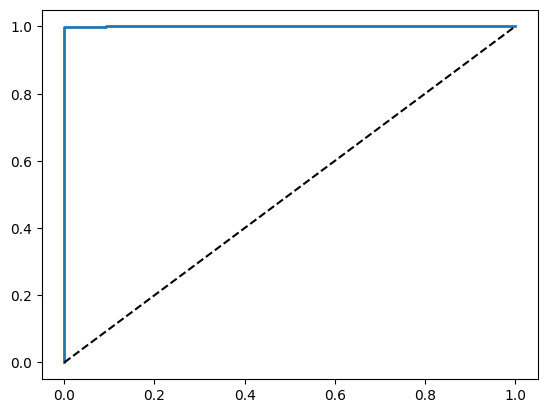

In [16]:
fpr, tpr, thresholds = roc_curve(y_train_poison, y_train_pred_log)
plot_roc_curve(fpr, tpr)
plt.show()

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=42)

In [18]:
y_train_pred_forest = cross_val_predict(
    clf_forest,
    x_train,
    y_train_poison,
    cv=3,
    method='predict_proba',
)

In [19]:
roc_auc_score(y_train_poison, y_train_pred_forest[:, 1])

0.9999998577616347

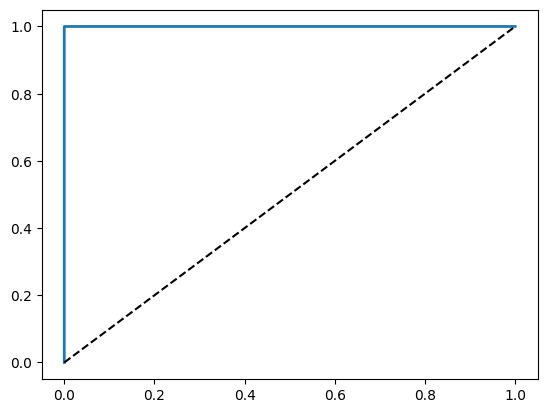

In [20]:
fpr, tpr, thresholds = roc_curve(y_train_poison, y_train_pred_forest[:, 1])
plot_roc_curve(fpr, tpr)
plt.show()

<10%> ¿Por qué lo eligiria el modelo por el area bajo la curva roc?

Respuesta:

- Logistic: 0.9998779594825482
- RandomForest: 0.9999998577616347

Eligiría el `RandomForest` ya que cuenta con un valor superior de **recall**, se le escapan menos hongos venenosos marcados como comestibles que al `Logistic`.

<15%> Utilice el método `GridSearchCV` sobre el modelo elegido,

en caso de ser `LogisticRegression`:

```python
param_grid = [
    {'C': [0.1, 1, 10] },
]
```

en caso de ser `RandomForest` utilize:

```python
param_grid = [
    {
        'n_estimators': [30, 100],
        'max_features': [2, 4, 6, 8],
    },
]
```

¿Cuál es el sentido de hacer esto?

Respuesta: el `GridSearchCV` busca los mejores parámetros para luego utilizarlo en el correspondiente clasificador, devolviendo un modelo con los parámetros que obtienen una mejor puntuación para el problema.

## Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_forest = [
    {
        'n_estimators': [30, 100],
        'max_features': [2, 4, 6, 8],
    },
]

grid_search_forest = GridSearchCV(
    clf_forest,
    param_grid_forest,
    cv=3,
    scoring='recall',
    return_train_score=True,
)
grid_search_forest.fit(x_train, y_train_poison)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 100]}],
             return_train_score=True, scoring='recall')

In [22]:
grid_search_forest.best_params_

{'max_features': 2, 'n_estimators': 30}

In [23]:
clf_forest = grid_search_forest.best_estimator_

In [24]:
y_train_pred_forest = cross_val_predict(
    clf_forest,
    x_train,
    y_train_poison,
    cv=3,
)

<5%> Imprima el valor de precision, recall, accuracy, f1 y auc_roc, en las regiones de validación

## Random Forest

In [25]:
from sklearn.metrics import precision_score

precision_score(y_train_poison, y_train_pred_forest)

1.0

In [26]:
from sklearn.metrics import recall_score

recall_score(y_train_poison, y_train_pred_forest)

0.998404085541015

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_poison, y_train_pred_forest)

0.9992306508693645

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_poison, y_train_pred_forest)

0.9992014055262738

In [29]:
roc_auc_score(y_train_poison, y_train_pred_forest)

0.9992020427705075

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [30]:
y_test_pred_forest = cross_val_predict(
    clf_forest,
    x_test,
    y_test_poison,
    cv=3,
)

In [31]:
precision_score(y_test_poison, y_test_pred_forest)

0.9974522292993631

In [32]:
recall_score(y_test_poison, y_test_pred_forest)

1.0

In [33]:
accuracy_score(y_test_poison, y_test_pred_forest)

0.9987692307692307

In [34]:
f1_score(y_test_poison, y_test_pred_forest)

0.9987244897959183

In [35]:
roc_auc_score(y_test_poison, y_test_pred_forest)

0.998812351543943

Respuesta: sí, los números son muy parecidos a los obtenidos en las regiones de validación. Esto puede deberse a la poca variedad existente en el dataset. Si el día de mañana llegasen datos acerca de una **nueva** especie de hongos por ejemplo, podría dar resultados erroneos ya que no ha sido entrenado con tales datos.